In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Questions
Understanding of events:
1. How many events are we considering? In how many different cities do we have the events?
2. How long are the events? How popular or large are they? Where exactly are they?
3. What types of events are they? 
4. How many cities of the event data are included in the listings data?

We can't really answer questions 2 and 3 with the given data except for how long the events are. In this notebook, I didn't really deal with missing data, but I looked at all NYC AirBnb listings from 2017 and noted whether there was an event going on on the date of the listing or if there was an event 1,2,3,4,5,6 or 7 days after the date of the listing.

# EDA

In [90]:
events = pd.read_csv(r'C:\Users\nandy\Desktop\DS4A Project\Airlines\Final 11\events_US.csv', encoding = "ISO-8859-1")
listings = pd.read_csv(r'C:\Users\nandy\Desktop\DS4A Project\Housing\Final 10\listings.csv', encoding = "ISO-8859-1")
calendar = pd.read_csv(r'C:\Users\nandy\Desktop\DS4A Project\Housing\Final 10\calendar.csv\calendar.csv', encoding = "ISO-8859-1")
events_selection = pd.read_csv(r'C:\Users\nandy\Desktop\DS4A Project\events_selection.csv', encoding = "ISO-8859-1")


events

,date,city,state,event_name
0,2/1/17,St. Louis,MO,NHL Winter Classic
1,4/1/17,New York,NY,National Board of Review of Motion Pictures Aw...
2,5/1/17,New York,NY,Winter Jazzfest NYC
3,5/1/17,Las Vegas,NV,International Consumer Electronics Show (CES)
4,5/1/17,New York,NY,Jazz Connect Conference
...,...,...,...,...
1146,13/12/2017,Las Vegas,NV,XLIVE
1147,17/12/2017,New York,NY,CNN Heroes: An All Star Tribute
1148,29/12/2017,South Lake Tahoe,CA,Snowglobe Festival
1149,30/12/2017,South Lake Tahoe,CA,Snowglobe Festival


In [91]:
events.shape[0]

1151

In [92]:
events.groupby(['city']).size().sort_values(ascending=False).head(10)

city
New York         199
Los Angeles       94
Nashville         71
Austin            48
Las Vegas         47
New Orleans       32
Chicago           30
San Francisco     26
Brooklyn          25
Charleston        22
dtype: int64

Most of the events are in New York (included in the AirBnb listings) followed by several cities that are not included in the listings. 

In [93]:
events['date'] = pd.to_datetime(events['date'], dayfirst=True)
events['length'] = events.groupby(['event_name'])['event_name'].transform('size') #Add the length of each event
events['start_date'] = events.groupby(['event_name'])['date'].transform('min')
events['end_date'] = events.groupby(['event_name'])['date'].transform('max')
events

,date,city,state,event_name,length,start_date,end_date
0,2017-01-02,St. Louis,MO,NHL Winter Classic,1,2017-01-02,2017-01-02
1,2017-01-04,New York,NY,National Board of Review of Motion Pictures Aw...,1,2017-01-04,2017-01-04
2,2017-01-05,New York,NY,Winter Jazzfest NYC,6,2017-01-05,2017-01-10
3,2017-01-05,Las Vegas,NV,International Consumer Electronics Show (CES),4,2017-01-05,2017-01-08
4,2017-01-05,New York,NY,Jazz Connect Conference,2,2017-01-05,2017-01-06
...,...,...,...,...,...,...,...
1146,2017-12-13,Las Vegas,NV,XLIVE,4,2017-12-10,2017-12-13
1147,2017-12-17,New York,NY,CNN Heroes: An All Star Tribute,1,2017-12-17,2017-12-17
1148,2017-12-29,South Lake Tahoe,CA,Snowglobe Festival,3,2017-12-29,2017-12-31
1149,2017-12-30,South Lake Tahoe,CA,Snowglobe Festival,3,2017-12-29,2017-12-31


In [94]:
events_selection.head(5)

,date,city,state,event_name,quarter,within_5_miles,within_10_miles,within_15_miles,within_20_miles,within_25_miles,within_30_miles,within_40_miles,within_50_miles
0,2017-04-01,New York,NY,National Board of Review of Motion Pictures Aw...,2,New York,New York,New York,New York,New York,New York,New York,New York
1,2017-05-01,New York,NY,Winter Jazzfest NYC,2,New York,New York,New York,New York,New York,New York,New York,New York
2,2017-05-01,New York,NY,Jazz Connect Conference,2,New York,New York,New York,New York,New York,New York,New York,New York
3,2017-06-01,New York,NY,Winter Jazzfest NYC,2,New York,New York,New York,New York,New York,New York,New York,New York
4,2017-06-01,New York,NY,Jazz Connect Conference,2,New York,New York,New York,New York,New York,New York,New York,New York


In [95]:
events_selection.groupby(['within_15_miles'])['within_15_miles'].count().sort_values(ascending=False).head(10)

within_15_miles
New York      200
Chicago        30
Washington     18
Boston          4
Denver          3
Name: within_15_miles, dtype: int64

Filter for events that are within 20 miles of a major metropolitan area that is listed in the AirBnb data

In [96]:
listings.groupby(['metropolitan']).size()

metropolitan
NYC        40740
boston      3585
chicago     5207
dc          7787
denver      2505
dtype: int64

We don't have enough information about the events to determine what type they are (sports, music, etc.) or how popular they are. We can get how long each event is. Most of the events are in NYC as are most of the listings in our dataset. It would be ideal to have more granular data about the location of the events. For now, I will focus on NYC in particular.

First, I'll look at the average price of an AirBnb in NYC throughout the year 2017. Then I'll look at the average price of the AirBnb in different neighborhoods.

In [97]:
listings['ref_price'] = listings['price']
listings_pricedropped = listings.drop(columns=['price'])
listings_pricedropped.head(5)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,ref_price
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464,99.0
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464,200.0
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464,300.0
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,...,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464,125.0
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464,69.0


In [98]:
listings.set_index('id')['price'].isna().sum()

0

In [99]:
print(calendar.set_index('date')['price'].isna().sum(level=0).sort_values(ascending=False))
calendar.set_index('listing_id')['price'].isna().sum(level=0).sort_values(ascending=False)

date
2017-05-19    45155.0
2017-05-20    44986.0
2017-05-13    44397.0
2017-05-12    44371.0
2017-05-11    43974.0
               ...   
2016-08-15     1060.0
2016-08-14     1038.0
2018-05-10      788.0
2016-05-18      760.0
2016-05-17      352.0
Name: price, Length: 724, dtype: float64


listing_id
12898806    570.0
6881827     365.0
1308155     365.0
4978798     365.0
13623182    365.0
            ...  
8402732       0.0
11274799      0.0
3943630       0.0
5786059       0.0
17718893      0.0
Name: price, Length: 59838, dtype: float64

In [100]:
merged = calendar.merge(listings_pricedropped, how='inner', left_on='listing_id', right_on='id')
merged.head(5)

,listing_id,date,available,price,metro_area,accommodates,amenities,availability_30,bathrooms,bed_type,...,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,ref_price
0,2515,2018-03-05,t,69.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,9.0,9.0,9.0,92.0,9.0,Private room,NY,720.0,10026.0,59.0
1,2515,2018-03-04,t,69.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,9.0,9.0,9.0,92.0,9.0,Private room,NY,720.0,10026.0,59.0
2,2515,2018-03-03,t,69.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,9.0,9.0,9.0,92.0,9.0,Private room,NY,720.0,10026.0,59.0
3,2515,2018-03-02,t,69.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,9.0,9.0,9.0,92.0,9.0,Private room,NY,720.0,10026.0,59.0
4,2515,2018-03-01,t,69.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,9.0,9.0,9.0,92.0,9.0,Private room,NY,720.0,10026.0,59.0


In [101]:
merged['date'] = pd.to_datetime(merged['date'])
merged_NY2017only = merged[merged['metropolitan'] == 'NYC'] 
merged_NY2017only = merged_NY2017only[merged_NY2017only['date'].dt.year == 2017]
merged_NY2017only

,listing_id,date,available,price,metro_area,accommodates,amenities,availability_30,bathrooms,bed_type,...,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,ref_price
64,2515,2017-12-31,t,169.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,9.0,9.0,9.0,92.0,9.0,Private room,NY,720.0,10026.0,59.0
65,2515,2017-12-30,t,129.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,9.0,9.0,9.0,92.0,9.0,Private room,NY,720.0,10026.0,59.0
66,2515,2017-12-29,t,129.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,9.0,9.0,9.0,92.0,9.0,Private room,NY,720.0,10026.0,59.0
67,2515,2017-12-28,t,129.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,9.0,9.0,9.0,92.0,9.0,Private room,NY,720.0,10026.0,59.0
68,2515,2017-12-27,t,129.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,9.0,9.0,9.0,92.0,9.0,Private room,NY,720.0,10026.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14870095,18519989,2017-05-07,f,NaN,NYC,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",0,1.0,Real Bed,...,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,11211,151.0
14870096,18519989,2017-05-06,f,NaN,NYC,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",0,1.0,Real Bed,...,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,11211,151.0
14870097,18519989,2017-05-05,f,NaN,NYC,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",0,1.0,Real Bed,...,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,11211,151.0
14870098,18519989,2017-05-04,f,NaN,NYC,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",0,1.0,Real Bed,...,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,11211,151.0


In [102]:
print(merged_NY2017only['price'].isna().sum())
print(merged_NY2017only['ref_price'].isna().sum())
print(merged_NY2017only.set_index('date')['price'].isna().sum(level=0).sort_values(ascending=False))
merged_NY2017only.set_index('listing_id')['price'].isna().sum(level=0).sort_values(ascending=False)

6304428
0
date
2017-05-05    34670.0
2017-05-06    34052.0
2017-05-19    32236.0
2017-05-20    31977.0
2017-05-18    31872.0
               ...   
2017-07-29    22604.0
2017-07-30    22235.0
2017-07-31    22036.0
2017-05-03    21552.0
2017-05-02     1777.0
Name: price, Length: 244, dtype: float64


listing_id
4983691     244.0
265194      244.0
13504845    244.0
13503536    244.0
12585689    244.0
            ...  
775016        0.0
16948224      0.0
773497        0.0
18084651      0.0
1832223       0.0
Name: price, Length: 40740, dtype: float64

We need to take care of missing values from the merged dataset.

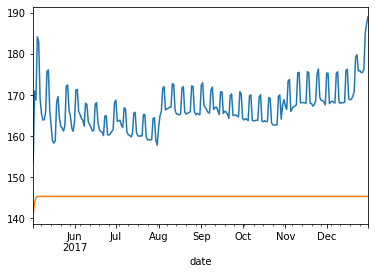

In [103]:
merged_NY2017only.groupby('date')['price'].mean().plot()
merged_NY2017only.groupby('date')['ref_price'].mean().plot()

There is an unexplained dip in the average AirBnb reference price in May. The average reference price is just the average price of the listings (they shouldn't be dependent on the date since there is only 1 price given per listing). The dip might be because there is no data for some of the listings at the specific May date.

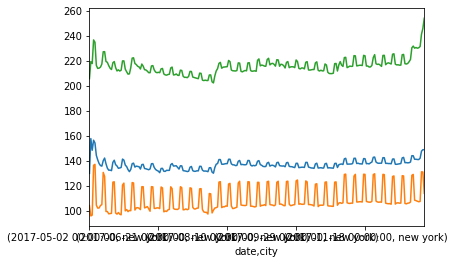

In [111]:
merged_NY2017only[merged_NY2017only['city'] == 'brooklyn'].groupby(['date','city'])['price'].mean().plot()
merged_NY2017only[merged_NY2017only['city'] == 'queens'].groupby(['date','city'])['price'].mean().plot()
merged_NY2017only[merged_NY2017only['city'] == 'new york'].groupby(['date','city'])['price'].mean().plot()


It seems like the neighborhood of NY affects the average AirBnb price (as expected). The prices do not fluctuate a lot over the year, though there are some small steps at certain times (based on the 4 neighborhoods I visualized - it may change if I look at others). In order to try with a more granular events database, I tried to look at events using the NYC Permitted Events dataset (https://data.cityofnewyork.us/City-Government/NYC-Permitted-Event-Information-Historical/bkfu-528j). However, there are too many events in this database, including ones that are not large events which many people would book AirBnbs for and it was not possible to filter those events out.

Filter for events that are within 15 mi of New York City (doesn't change the number much for NYC). Add features to full dataset: for each listing (each row), is an event happening the day of, in 1 day, 2 days, 3 days, 4 days, 5 days, 6 days, 7 days?

In [115]:
events_selection_merged = events_selection.iloc[:,3:].merge(events, how='inner', on='event_name')
events_selection_NY = events_selection_merged[events_selection_merged['within_15_miles'] == 'New York']
merged_NY2017only['dayof'] = merged_NY2017only['date'].isin(events_selection_NY['date'])    
merged_NY2017only['in_1day'] = (merged_NY2017only['date'] + pd.Timedelta(days=1)).isin(events_selection_NY['date'])  
merged_NY2017only['in_2days'] = (merged_NY2017only['date'] + pd.Timedelta(days=2)).isin(events_selection_NY['date'])  
merged_NY2017only['in_3days'] = (merged_NY2017only['date'] + pd.Timedelta(days=3)).isin(events_selection_NY['date'])  
merged_NY2017only['in_4days'] = (merged_NY2017only['date'] + pd.Timedelta(days=4)).isin(events_selection_NY['date'])  
merged_NY2017only['in_5days'] = (merged_NY2017only['date'] + pd.Timedelta(days=5)).isin(events_selection_NY['date'])  
merged_NY2017only['in_6days'] = (merged_NY2017only['date'] + pd.Timedelta(days=6)).isin(events_selection_NY['date'])  
merged_NY2017only['in_7days'] = (merged_NY2017only['date'] + pd.Timedelta(days=7)).isin(events_selection_NY['date'])  
merged_NY2017only

,listing_id,date,available,price,metro_area,accommodates,amenities,availability_30,bathrooms,bed_type,...,zipcode,ref_price,dayof,in_1day,in_2days,in_3days,in_4days,in_5days,in_6days,in_7days
64,2515,2017-12-31,t,169.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,10026.0,59.0,False,False,False,False,False,False,False,False
65,2515,2017-12-30,t,129.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,10026.0,59.0,False,False,False,False,False,False,False,False
66,2515,2017-12-29,t,129.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,10026.0,59.0,False,False,False,False,False,False,False,False
67,2515,2017-12-28,t,129.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,10026.0,59.0,False,False,False,False,False,False,False,False
68,2515,2017-12-27,t,129.0,NYC,2.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,...,10026.0,59.0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14870095,18519989,2017-05-07,f,NaN,NYC,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",0,1.0,Real Bed,...,11211,151.0,False,False,False,False,False,False,False,False
14870096,18519989,2017-05-06,f,NaN,NYC,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",0,1.0,Real Bed,...,11211,151.0,True,False,False,False,False,False,False,False
14870097,18519989,2017-05-05,f,NaN,NYC,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",0,1.0,Real Bed,...,11211,151.0,False,True,False,False,False,False,False,False
14870098,18519989,2017-05-04,f,NaN,NYC,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",0,1.0,Real Bed,...,11211,151.0,False,False,True,False,False,False,False,False
